EDA(Exploratory Data Analysis) on Haberman’s Survival Data Set

Can you diagnose Cancer?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer. 

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)

In [4]:
df=pd.read_csv('haberman.csv')

In [5]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.shape

(306, 4)

There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

1.Age
2.Operation Year
3.Number of Axillary nodes(Lymph Nodes)
4.Survival Status

In [7]:
data = df.rename(columns = {'age': 'Age', 'year': 'Operation Year','nodes': 'Number of Auxilliary Nodes', 'status': 'Survival Status'}, inplace = False)

In [8]:
data.head()

,Age,Operation Year,Number of Auxilliary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


data['Survival Status'].value_counts()


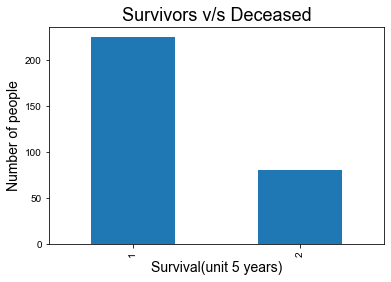

In [9]:
#Bar plot between number of survivors and deceased to get an overview of severity of the disease

pd.value_counts(data['Survival Status']).plot.bar()
plt.title('Survivors v/s Deceased',fontsize=18)
plt.ylabel('Number of people', fontsize=14)
plt.xlabel('Survival(unit 5 years)', fontsize=14)
sns.set_style("whitegrid")
plt.show()

For every 275 survivors, there are near to 75 people being not making it for more than 5 years. Therefore, percentage of people that are being deceased before 5 years is 21.4%.

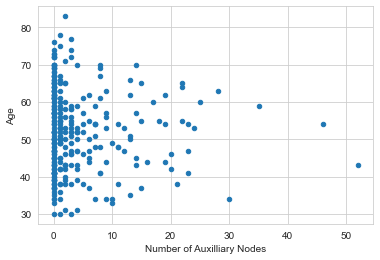

In [10]:
#2D SCATTER PLOTS

data.plot(kind='scatter',x='Number of Auxilliary Nodes',y='Age')
plt.show()

Data is overlapping and use of single color is making the interpretability low

D:\Program Files\anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


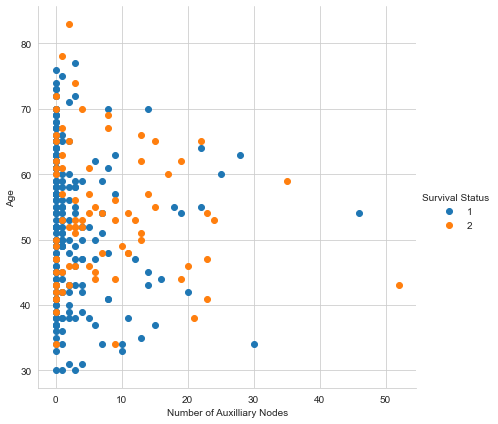

In [11]:
#2D SCATTER PLOTS WITH DIFFERENT COLORS FOR TARGET VARIABLES

sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Survival Status', size=6) \
 .map(plt.scatter, 'Number of Auxilliary Nodes', 'Age') \
 .add_legend();
plt.show();

Interpratability has clearly improved, but it is difficult to come at a conclusion due to high overlap of data points.

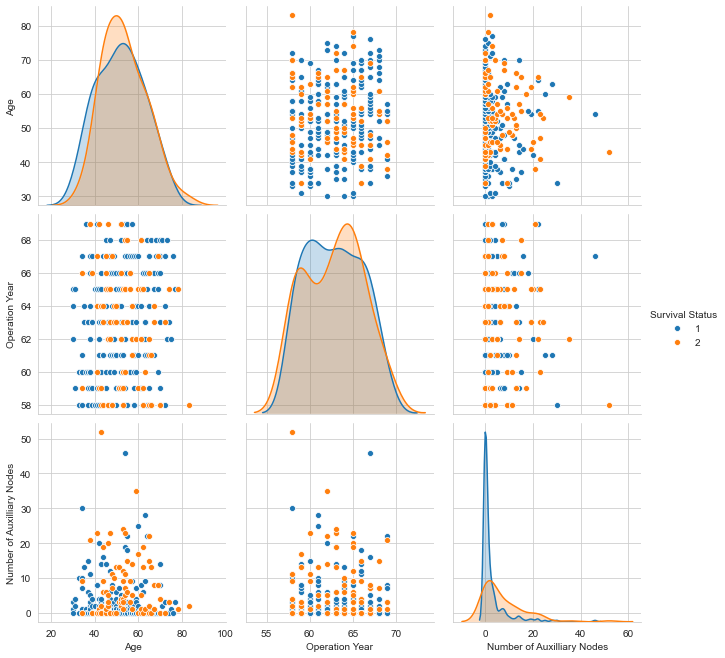

In [12]:
#Since interpretability in 2D was difficult, we visualize the data in 3-Dimensions.

#3D SCATTER PLOT  or  PAIR PLOT

plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue='Survival Status', height=3)
plt.show()

Plot 1,Plot 5 and Plot 9 are the histograms of all combinations of features which explain you the density of data. Other than  these, only plots 3/7 provide us with some conclusive information.

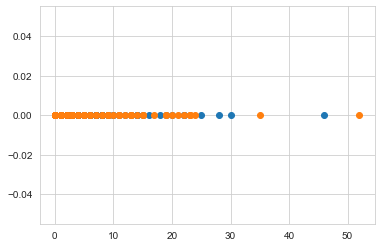

In [13]:
#1D SCATTER PLOT
Survivor= data.loc[data['Survival Status']==1]
Deceased=data.loc[data['Survival Status']==2]

plt.plot(Survivor['Number of Auxilliary Nodes'], np.zeros_like(Survivor['Number of Auxilliary Nodes']), 'o')
plt.plot(Deceased['Number of Auxilliary Nodes'], np.zeros_like(Deceased['Number of Auxilliary Nodes']), 'o')
plt.show()

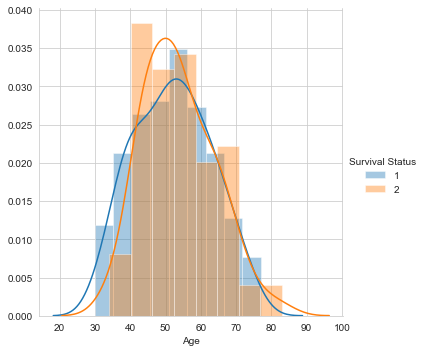

In [14]:
#UNIVARIATE ANALYSIS
#PDF
sns.FacetGrid(data,hue='Survival Status',height=5).map(sns.distplot,'Age').add_legend()

In the age range from 30–75, the status of survival and death is the same

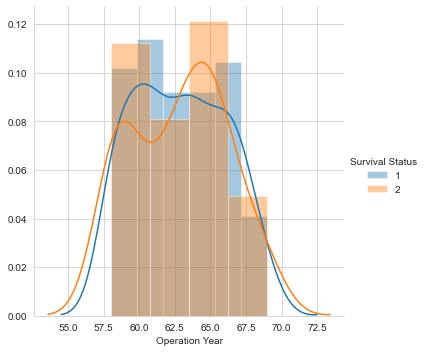

In [15]:
sns.FacetGrid(data,hue='Survival Status',height=5).map(sns.distplot,'Operation Year').add_legend()

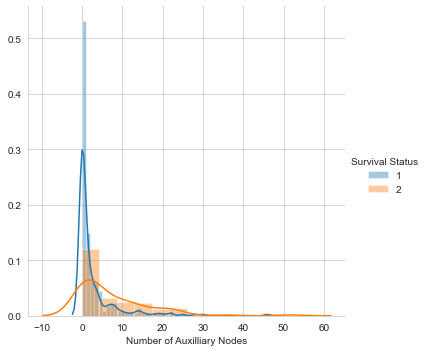

In [16]:
sns.FacetGrid(data,hue='Survival Status',height=5).map(sns.distplot,'Number of Auxilliary Nodes').add_legend()

If auxilliary nodes are in between 0 and 3,5, patients survival status is clearly high. And it is low if nodes> 3.5

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


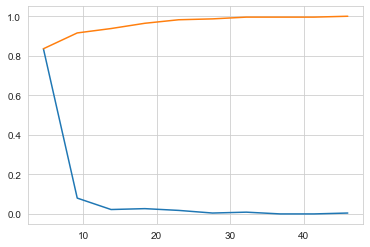

In [17]:
#CDF of Long Survival status

# Using 'cumsum' function from Numpy
counts, bin_edges = np.histogram(Survivor['Number of Auxilliary Nodes'], bins=10, density = True)
pdf= counts/ (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges [1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


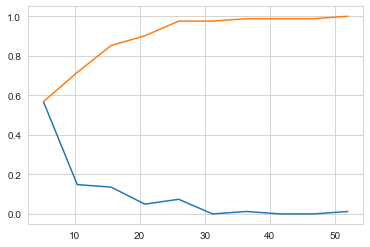

In [18]:
#CDF of Short Survival status

counts, bin_edges = np.histogram(Deceased['Number of Auxilliary Nodes'], bins=10, density = True)
pdf= counts/ (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges [1:],pdf, label='yes')
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


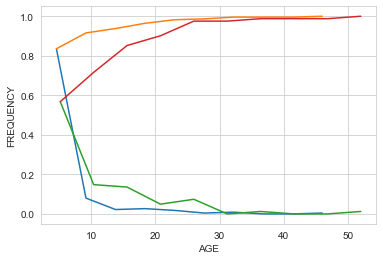

In [19]:
#CDF for both features SURVIVED and DECEASED

#SURVIVED
counts, bin_edges = np.histogram(Survivor['Number of Auxilliary Nodes'], bins=10, density = True)
pdf= counts/ (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges [1:],pdf)
plt.plot(bin_edges[1:],cdf)

#DECEASED
counts, bin_edges = np.histogram(Deceased['Number of Auxilliary Nodes'], bins=10, density = True)
pdf= counts/ (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges [1:],pdf, label='yes')
plt.plot(bin_edges[1:],cdf)

 #adding labels
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")

plt.show()

In [20]:
#MEAN and SD
print('Means:')
print (np.mean(Survivor['Number of Auxilliary Nodes']))
print (np.mean(np.append(Survivor['Number of Auxilliary Nodes'],50)))
print (np.mean(Deceased['Number of Auxilliary Nodes']))
print (np.mean(np.append(Deceased['Number of Auxilliary Nodes'],50)))

print('\nStandard Deviation:')
print(np.mean(Survivor['Number of Auxilliary Nodes']))
print(np.mean(Deceased['Number of Auxilliary Nodes']))

Means:
2.7911111111111113
3.0
7.45679012345679
7.975609756097561

Standard Deviation:
2.7911111111111113
7.45679012345679


In [21]:
#MEDIAN, %tile, QUANTILE, IQR, MAD

print('Medians:')
print(np.median(Survivor['Number of Auxilliary Nodes']))
print(np.median(Deceased['Number of Auxilliary Nodes']))
print(np.median(np.append(Deceased['Number of Auxilliary Nodes'],50)))

print('\nQuantiles:')
print(np.percentile(Survivor['Number of Auxilliary Nodes'],np.arange(0,100,25)))
print(np.percentile(Deceased['Number of Auxilliary Nodes'],np.arange(0,100,25)))

print('\n90th percentile:')
print(np.percentile(Survivor['Number of Auxilliary Nodes'],90))
print(np.percentile(Deceased['Number of Auxilliary Nodes'],90))

from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(Survivor['Number of Auxilliary Nodes']))
print(robust.mad(Deceased['Number of Auxilliary Nodes']))

Medians:
0.0
4.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


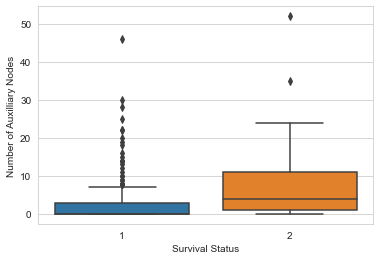

In [22]:
#BOX PLOTS

sns.boxplot(x='Survival Status',y='Number of Auxilliary Nodes', data=data)
plt.show()

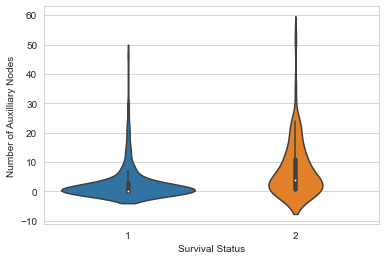

In [23]:
#VIOLIN

sns.violinplot(x='Survival Status', y='Number of Auxilliary Nodes',data=data)
plt.legend
plt.show()


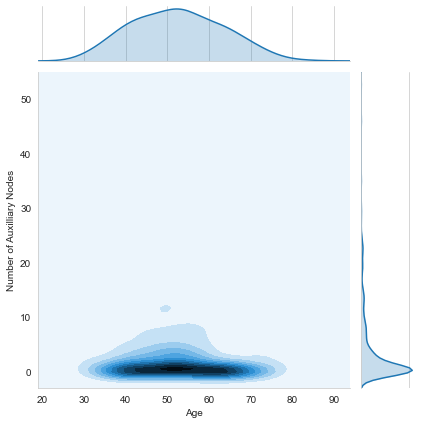

In [24]:
#contour plot

sns.jointplot(x='Age',y='Number of Auxilliary Nodes',data=data,kind='kde')
plt.grid()
plt.show()

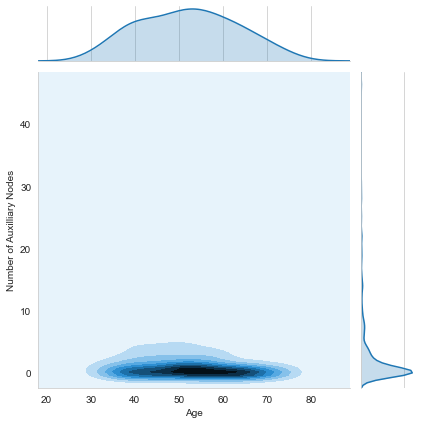

In [25]:
sns.jointplot(x='Age',y='Number of Auxilliary Nodes',data=Survivor,kind='kde')
plt.grid()
plt.show()